In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Properties of real network datasets were extracted by executing
````
python extract_real_networks_properties.py
````

In [2]:
filename = '../../directed-geometric-networks_data/real_networks/network_properties/all_gprop.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

In [3]:
filename = '../../directed-geometric-networks_data/real_networks/network_properties/graph_properties.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
netzschleuderDF = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

validCategories = ['Economic', 'Transportation', 'Technological', 'Informational', 'Biological', 'Social']
markers = cycle(('X', '^', 'D', 'H', 'o', 'p', 'h', 'P', 'v', 's'))
colorMap = dict(zip(validCategories, sns.color_palette('deep', int(len(validCategories)))))
markerMap = dict(zip(validCategories, markers))

recip = {cat: [] for cat in validCategories}
clust = {cat: [] for cat in validCategories}

for networkName in df.index:
    
    if 'add_health' in networkName:
        cat = ['Social']
    else:
        if 'freshman_t' in networkName:
            cat = [tag for tag in netzschleuderDF.loc[networkName.replace('man', 'men')]['tags'].split(',') if tag in validCategories]
        else:
            cat = [tag for tag in netzschleuderDF.loc[networkName]['tags'].split(',') if tag in validCategories]
    if len(cat) == 0:
        cat = 'other'
        print(networkName + ' does not have a category')
    else:
        cat = cat[0]

    recip[cat].append(df.loc[networkName]['reciprocity_ratio'])
    clust[cat].append(df.loc[networkName]['avg_undir_loc_clust'])

labels = {'Biological': 'biol.',
          'Economic': 'econ.',
          'Informational': 'inform.',
          'Social': 'social',
          'Technological': 'techo.',
          'Transportation': 'transp.'}

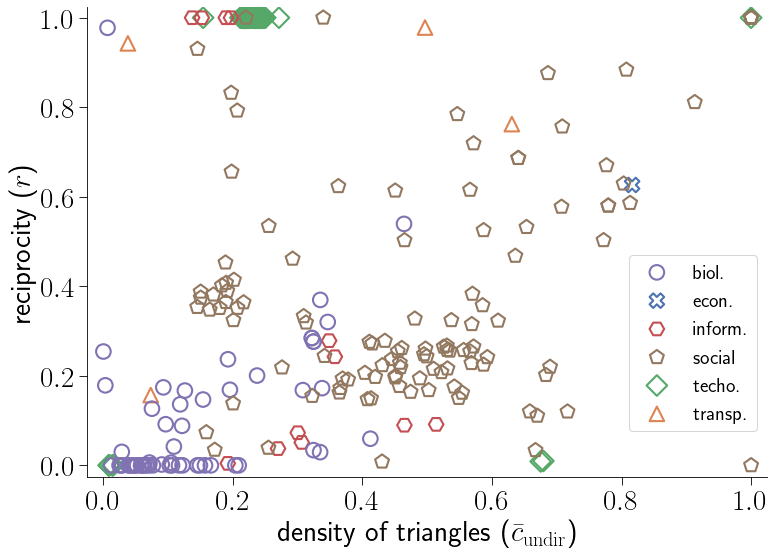

In [4]:
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'
plt.rcParams["font.size"] = 28
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams["font.weight"] = 'light'

fig, ax = plt.subplots(figsize=(11.7, 8.3), dpi=75)

for cat in validCategories:
    ax.scatter(clust[cat], recip[cat], facecolor='None', edgecolor=colorMap[cat], s=196, marker=markerMap[cat], linewidth=2)

for cat in sorted(validCategories):
    ax.scatter(np.NaN, np.NaN, facecolor='None', edgecolor=colorMap[cat], s=196, marker=markerMap[cat], linewidth=2, label=labels[cat])

ax.set_xlabel(r'density of triangles ($\bar{c}_\mathrm{undir}$)')
ax.set_ylabel(r'reciprocity ($r$)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.set_xscale('log')

ax.set_xlim(left=-0.025, right=1.025)
ax.set_ylim(bottom=-0.025, top=1.025)

ax.tick_params(length=8)

ax.legend(loc='lower right', frameon=True, fontsize='x-small', bbox_to_anchor=(1.0, 0.075))

fig.savefig("../figures/pdf/figure_paper_real_networks_reciprocity_vs_clustering.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_real_networks_reciprocity_vs_clustering.svg", bbox_inches='tight')